# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [74]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [75]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [76]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.15, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.15,1631.50,2.00,52.00,21.60,679.45
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.85,3542.25,4.50,125.25,46.59,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [77]:
# Filter apartments with area between 40 and 140 m2 and price per m2 between 20 and 50
df = df_orig.loc[(df_orig['area'] >= 40) & (df_orig['area'] <= 140) & 
                 (df_orig['price_per_m2'] >= 20) & (df_orig['price_per_m2'] <= 50)]


### Shape (number of rows and colums)

In [78]:
# Number of rows and columns
print(df.shape)

(547, 16)


### Data types

In [79]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [80]:
df.describe()
#df_orig.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,47.406392,8.604637,182.071298,3.433272,85.733090,0.010969,2484.469835,29.497989,142570.729433,2371.970654,154422.575868,27.834071,80131.979576
std,0.086197,0.120958,81.777822,0.940359,22.678314,0.104252,794.820984,7.260146,178648.892463,1668.139867,214065.361488,7.603676,14415.870239
min,47.195290,8.367652,1.000000,1.000000,41.000000,0.000000,1050.000000,20.000000,698.000000,87.959866,144.000000,7.984791,64322.797996
25%,47.354221,8.512141,118.000000,2.500000,68.000000,0.000000,1900.000000,23.995000,9345.000000,1044.628957,4293.000000,24.535004,70118.996920
50%,47.398319,8.572097,223.000000,3.500000,85.000000,0.000000,2380.000000,27.260000,24990.000000,1662.597326,18911.000000,27.785687,79504.517343
75%,47.481750,8.715908,261.000000,4.500000,102.000000,0.000000,2900.000000,33.265000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.866929,298.000000,6.500000,140.000000,1.000000,6650.000000,50.000000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [81]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 547 Min: 1050.0 Max: 6650.0 Mean: 2484.5 Median: 2380.0 Std: 794.8
Area: Count: 547 Min: 41.0 Max: 140.0 Mean: 85.7 Median: 85.0 Std: 22.7


### Skewness

In [82]:
df[['price','rooms', 'area']].skew()

price    1.389001
rooms    0.082763
area     0.254002
dtype: float64

### Kurtosis

In [83]:
df[['price','rooms', 'area']].kurtosis()

price    3.660065
rooms   -0.230110
area    -0.648710
dtype: float64

### Extreme values

In [84]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


In [85]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


### Get a list of categories of categorical variable

In [86]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Bülach', 'Dielsdorf', 'Dietikon', 'Dietlikon',
       'Dübendorf', 'Dürnten', 'Egg', 'Eglisau', 'Elsau', 'Embrach',
       'Fehraltorf', 'Feuerthalen', 'Fällanden', 'Glattfelden',
       'Gossau (ZH)', 'Greifensee', 'Hedingen', 'Hettlingen', 'Hinwil',
       'Hombrechtikon', 'Höri', 'Kloten', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Neerach',
       'Neftenbach', 'Niederglatt', 'Niederhasli', 'Niederweningen',
       'Oberengstringen', 'Oberglatt', 'Obfelden', 'Oetwil am See',
       'Oetwil an der Limmat', 'Opfikon', 'Ossingen', 'Pfungen',
       'Pfäffikon', 'Regensdorf', 'Rheinau', 'Richterswil', 'Rorbas',
       'Russikon', 'Rüti (ZH)', 'Schlatt (ZH)', 'Schlieren',
       'Schwerzenbach', 'Seuzach', 'Stadel', 'Stallikon', 'Steinma

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [87]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.5
luxurious,,,,,,,,,,,
0,6,8,30,112,42,177,25,117,2,21,1
1,0,0,0,5,0,1,0,0,0,0,0


### Pivot tables

In [88]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0             6   75.666667     6  2136.333333            6  29.250000
1.5   0             8   56.250000     8  2265.625000            8  40.576250
2.0   0            30   57.666667    30  1796.466667           30  31.808667
2.5   0           112   67.455357   112  2155.089286          112  32.349196
      1             5   71.600000     5  2627.400000            5  36.774000
3.0   0            42   67.642857    42  1998.119048           42  29.290952
3.5   0           177   87.587571   177  2532.451977          177  28.964181
      1             1  105.000000     1  3410.000000            1  32.480000
4.0   0            25   93.280000    25  2920.640000           25  31.176000
4.5   0           117  106.991453   117  2794.170940          117  26.060171
5.0   0             2  115.000000     2  3392.500000            2  29.670000
5.5   0            21  127.619048    21  3496.047619           21  27.080952
6.5   0             1  140.000000     1  3950.000000            1  28.210000

### Correlation matrix

In [89]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.955650,0.113357,-0.522817,-0.679039,-0.730960
area,0.955650,1.000000,0.400922,-0.248596,-0.432732,-0.497577
price,0.113357,0.400922,1.000000,0.787685,0.652325,0.595048
price_per_m2,-0.522817,-0.248596,0.787685,1.000000,0.980727,0.963777
pop_dens,-0.679039,-0.432732,0.652325,0.980727,1.000000,0.997305
frg_pct,-0.730960,-0.497577,0.595048,0.963777,0.997305,1.000000


### Covariance matrix

In [90]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,0.884276,16.437285,324.848258,-2.042112,-3.490676e+02,-1.081498
area,16.437285,514.305918,11834.464461,-44.551783,-5.821752e+03,-18.963740
price,324.848258,11834.464461,631740.396066,2998.312119,4.928580e+05,844.187461
price_per_m2,-2.042112,-44.551783,2998.312119,52.709718,8.078880e+03,16.622631
pop_dens,-349.067563,-5821.752378,492857.966862,8078.880279,2.782691e+06,7978.966812
frg_pct,-1.081498,-18.963740,844.187461,16.622631,7.978967e+03,57.815892


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

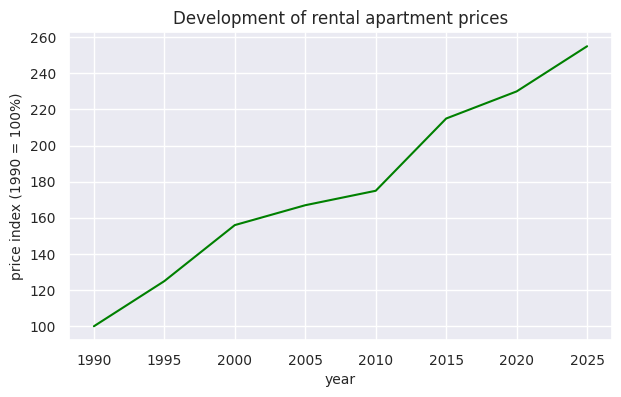

In [91]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

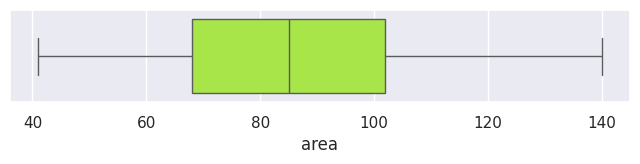

In [92]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

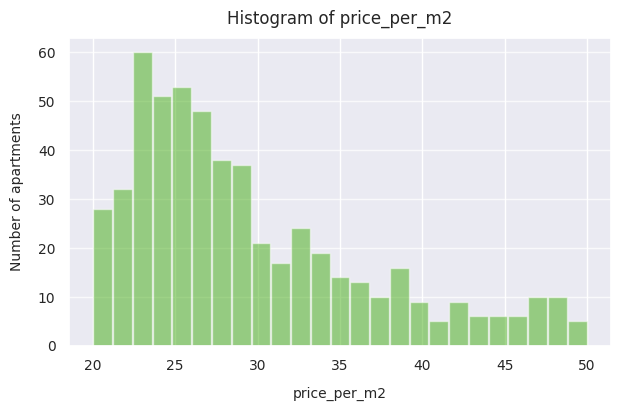

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

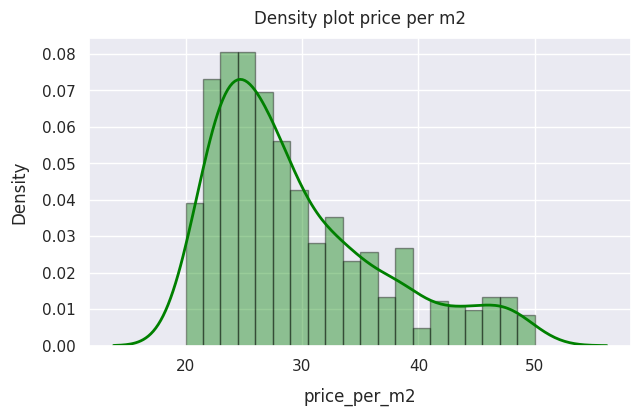

In [94]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
72    41.0 -1.972505
206   41.0 -1.972505
212   42.0 -1.928410
93    43.0 -1.884315
234   43.0 -1.884315
..     ...       ...
730  140.0  2.392899
707  140.0  2.392899
293  140.0  2.392899
760  140.0  2.392899
663  140.0  2.392899

[547 rows x 2 columns]


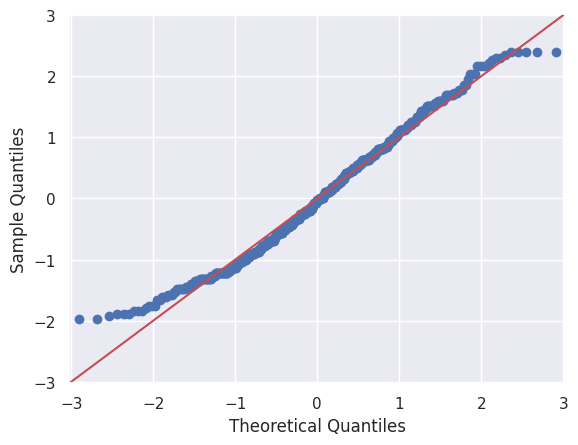

In [95]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [96]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[6.5, 5.0, 1.0, 1.5, 5.5, 4.0, 2.0, 3.0, 2.5, 4.5, 3.5]

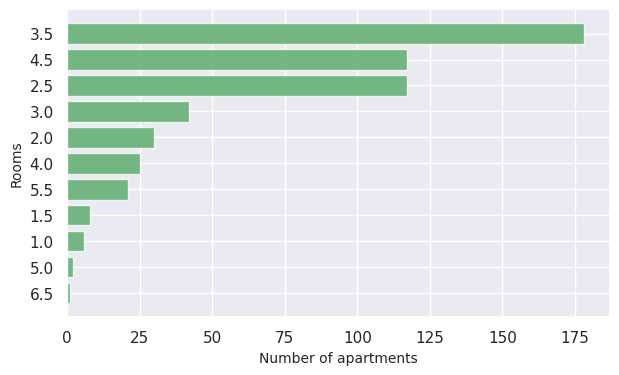

In [97]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

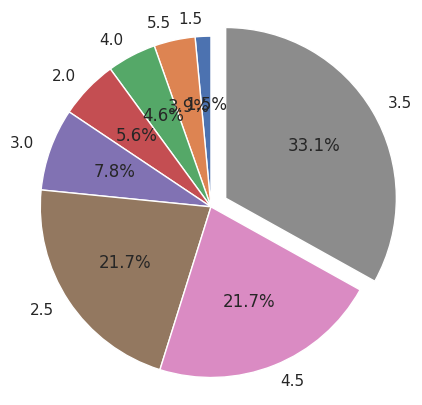

In [98]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

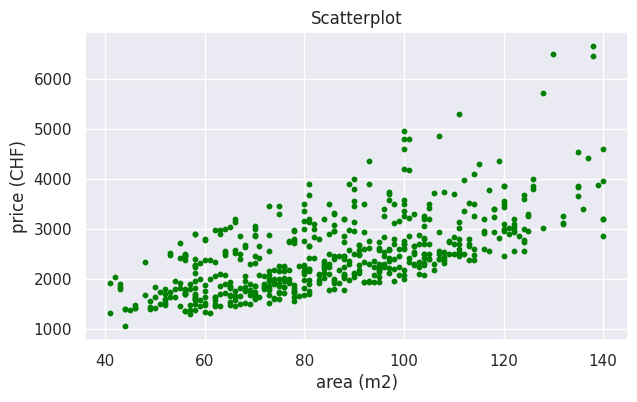

In [99]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(547, 17)
23.010554717735396
511.70388657601717


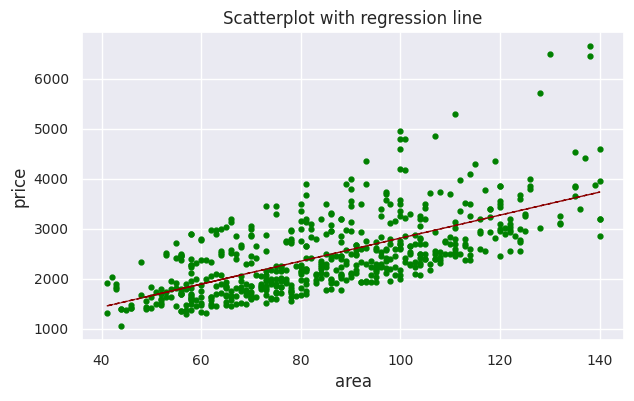

In [100]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

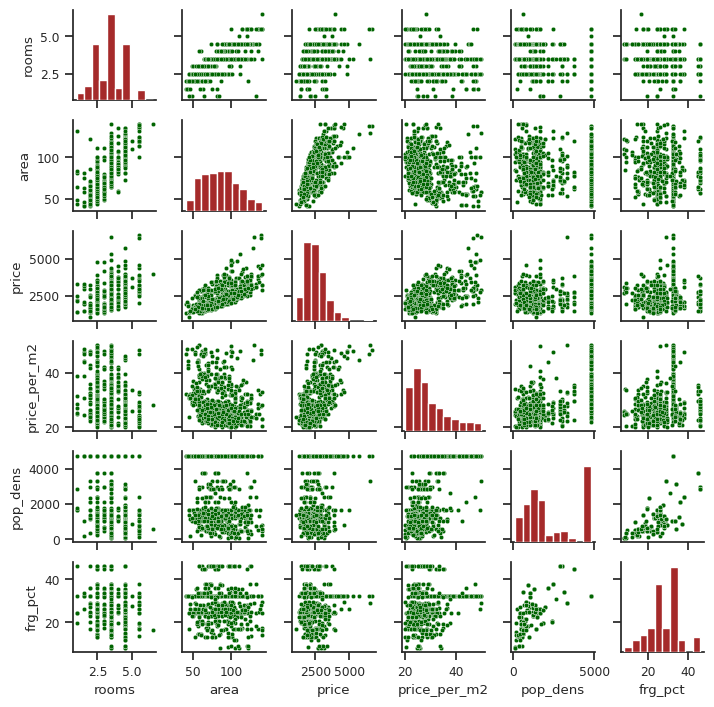

In [101]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(544, 17)


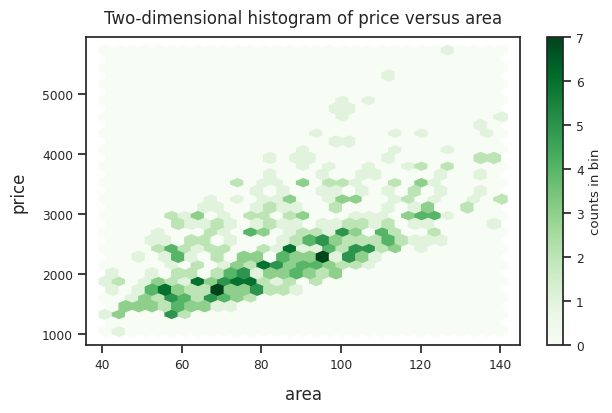

In [102]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

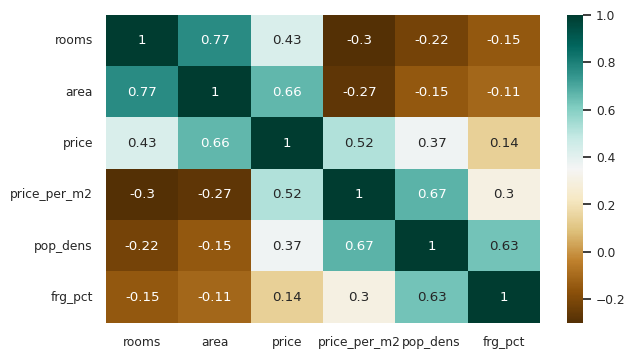

In [103]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

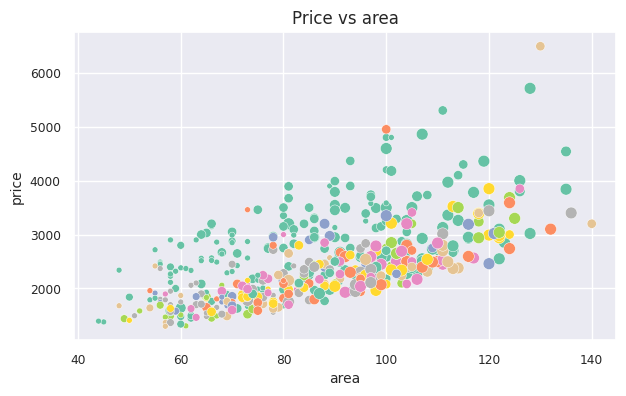

In [104]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [105]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-09 16:59:19
Python Version: 3.11.10
-----------------------------------
